In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r'C:\Users\singh\Documents\DATA ANALYTICS BOOTCAMP\data_jobs.csv')

# converting the job_posted_date object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [2]:
# filtering the dataset only for the data analyst role
df = df[df['job_title_short'] == 'Data Analyst']

In [13]:
df_exploded = df.explode('job_skills') 
df_exploded.groupby('job_skills').size()

# giving column name and the agg function using the tuple
skills_stats = df_exploded.groupby('job_skills').agg(
  skill_count = ('job_skills', 'count'),
  median_salary = ('salary_year_avg', 'median')
)

skills_stats = skills_stats.sort_values(by='skill_count', ascending=False).head(10)

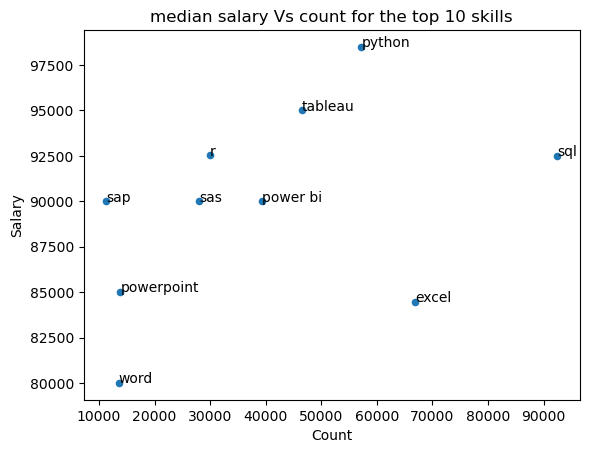

In [19]:
skills_stats.plot(kind='scatter', x = 'skill_count', y = 'median_salary')
plt.title('median salary Vs count for the top 10 skills')
plt.ylabel('Salary')
plt.xlabel('Count')

#Now to label the points on the graph

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()